## Author - Nevena Mitic



## Problem statement - Data exploration

Code below shows some part of cleaning and preparing data, and visualization. Python library used : numpy, pandas, matplotlib, seaborn




## About the data set
This data set is from the [Univeristy of California Irving Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg) 
The dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

Data Set Information:

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original". 

Attribute Information:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

In [1]:
# Location of dataset
fileName = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

## Load and examine the data set
The code shown in the cell below loads the data from the file. Some minimal clean up is performed on the data. Median imputation of the missing numeric values was done. The result is a Pandas data frame.

In [2]:
# Load necessary libraries
import numpy as np
import pandas as pd

# Read in data as a pandas data frame
fileName = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
Auto = pd.read_csv(fileName,sep='\s+', header=None)
# Find proper column names here:
# https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names
Auto.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
               'acceleration', 'model year', 'origin', 'car name']

# Check number of rows and columns
print(Auto.shape)
# Check the data types
print(Auto.dtypes)

# looking at the first and last few lines of the data frame using the head and tail methods
print(Auto.head(10))
print(Auto.tail(10))

# Median imputation of the missing numeric values
# Corece to numeric and impute medians for horsepower column
Auto.loc[:, "horsepower"] = pd.to_numeric(Auto.loc[:, "horsepower"], errors='coerce')
HasNan = np.isnan(Auto.loc[:,"horsepower"])
Auto.loc[HasNan, "horsepower"] = np.nanmedian(Auto.loc[:,"horsepower"])


(398, 9)
mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object
    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   
5  15.0          8         429.0      198.0  4341.0          10.0          70   
6  14.0          8         454.0      220.0  4354.0           9.0          70   
7  14.0          8         440.0      215.0  4312.0           8.5          70   
8  14.0          8         455.0

Some key things to notice here are:

- There are 398 rows or cases in the data set.
- The data set has 9 variables or columns.
- Columns have a type of either `object` (character), `float64` (floating point number), or `int64` (integer). 

### Summary statistics

Used The Pandas `describe` method to do summary statistics


In [3]:
Auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


- The minimum and maximum values of each variable are displayed.
- The mean is displayed. Compare the mean and the median, we can see they are often quite different. This is a sign of a skewed distribution
- The standard deviation is displayed. A low standard deviation indicates that the data points tend to be close to the mean (also called the expected value) of the set, while a high standard deviation indicates that the data points are spread out over a wider range of values.

### Frequency tables

Below code is used to summarize categorical value based on counts. For that, a new column has been created in the dataframe called counts. This column contains integer 1 values. The number of elements in each group can be counted, or simply summed. The frequency table shows the count of each category of the variable. 

In [4]:
# Decoding categorical data("origin" column)
Auto.loc[:, "origin"] = Auto.loc[:, "origin"].astype('str')
Replace = Auto.loc[:, "origin"] == "1"
Auto.loc[Replace, "origin"] = "USA"

Replace = Auto.loc[:, "origin"] == "2"
Auto.loc[Replace, "origin"] = "EUR"

Replace =Auto.loc[:, "origin"] == "3"
Auto.loc[Replace, "origin"] = "JPY"

In [5]:
# Frequency tables with multiple levels of grouping, by "origin" and "cylinders"
Auto['counts'] = 1
Auto[['counts', 'origin', 'cylinders']].groupby(['origin', 'cylinders']).agg('count')

counts
origin cylinders        
EUR    4              63
       5               3
       6               4
JPY    3               4
       4              69
       6               6
USA    4              72
       6              74
       8             103

## Exploration and Visualization of Data


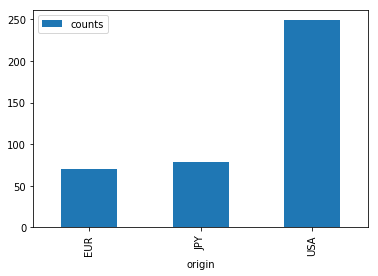

In [6]:
# Bar plots are used to display the counts or frequency of unique values
%matplotlib inline
Auto.loc[:, ['origin', 'counts']].groupby(['origin']).agg('count').plot.bar()

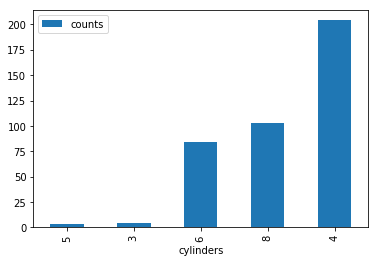

In [7]:
Auto.loc[:, ['cylinders', 'counts']].groupby(['cylinders']).agg('count').sort_values('counts').plot.bar()

From this display we can see that "4 cylinder" is the most frequent, and "5 cylinder" is the least frequent. 

Text(0.5,0,'City MPG')

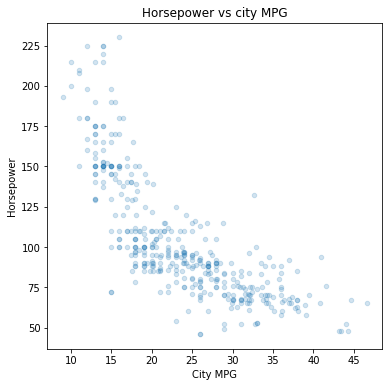

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
ax = plt.figure(figsize=(6, 6)).gca() # define axis
Auto.plot.scatter(x = 'mpg', y = 'horsepower', ax = ax, alpha = 0.2)
ax.set_title('Horsepower vs city MPG') # Give the plot a main title
ax.set_ylabel('Horsepower')# Set text for y axis
ax.set_xlabel('City MPG')

From the plot above we can see that The city MPG increases as the horsepower decreases. Also, there is a considerable overplotting. 

Because of that, in the next section we will use Hexbin plot to display data. 
The hexbin plot displays the point density within hexagonal regions or bins. The plot area can be divided into a selected number of bins both vertically or horizontally.

Text(0.5,0,'City MPG')

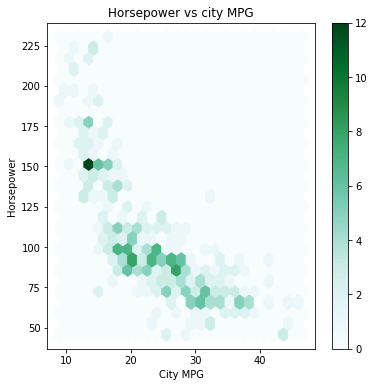

In [9]:
ax = plt.figure(figsize=(6, 6)).gca() # define axis
Auto.plot.hexbin(x = 'mpg', y = 'horsepower', gridsize = 25, ax = ax)
ax.set_title('Horsepower vs city MPG') # Give the plot a main title
ax.set_ylabel('Horsepower')# Set text for y axis
ax.set_xlabel('City MPG')

From the plot above, we can see that the approximate most frequent MPG and horsepower combination is 15(MPG) and 150 (horsepower)

Text(0.5,1,'Weight vs. City MPG \n with origin by color')

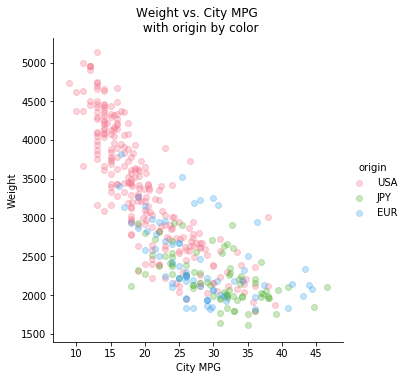

In [10]:
# Adding color to view an additional dimension ("origin" value) on a scatter plot.
import seaborn as sns
sns.lmplot(x = 'mpg', y = 'weight', 
           data = Auto, 
           hue = "origin", 
           palette="husl", 
           scatter_kws={'alpha':0.3},
           fit_reg = False)
plt.xlabel('City MPG')
plt.ylabel('Weight')
plt.title('Weight vs. City MPG \n with origin by color')

In the above plot we compared weight and MPG. From the plot we can see that a USA cars generally weight more and have lower MPG.

In [11]:
# Code below computes the correlation matrix, using the Pandas corr method
auto_corr = Auto[['mpg', 'cylinders', 'horsepower', 'weight', 'acceleration']].corr()
print(auto_corr)

                   mpg  cylinders  horsepower    weight  acceleration
mpg           1.000000  -0.775396   -0.773453 -0.831741      0.420289
cylinders    -0.775396   1.000000    0.841284  0.896017     -0.505419
horsepower   -0.773453   0.841284    1.000000  0.862442     -0.686590
weight       -0.831741   0.896017    0.862442  1.000000     -0.417457
acceleration  0.420289  -0.505419   -0.686590 -0.417457      1.000000


In the above correlation matrix we can see that the most pairs of variables are strongly correlated. (For example: horsepower and cylinders, horsepower and weight...)

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text xticklabel objects>)

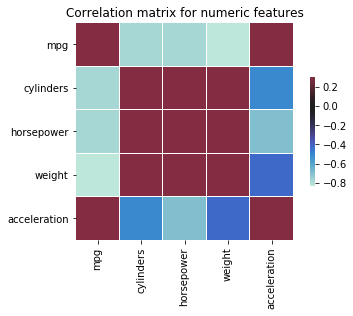

In [12]:
# The code below creates the heatmap plot of the correlation matrix
sns.heatmap(auto_corr, vmax=.3, center=0,
            square=True, linewidths=.25, cbar_kws={"shrink": .5})
plt.title('Correlation matrix for numeric features')
plt.yticks(rotation='horizontal')
plt.xticks(rotation='vertical')

From the correlation table we can see strong negative correlation between MPG and weight, MPG and horsepower. It's expected, because MPG increases when weight and horsepower of the car decreases.